In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#solved chinese display in matplotlib
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams["font.family"] = "DFKai-SB"
rcParams['axes.unicode_minus'] = False

from tqdm import tqdm_notebook,tnrange
from tqdm.autonotebook import tqdm
tqdm.pandas()

import regex as re
industry=['金融業', 'IC製造', 'IC設計', '電子零件元件', '電腦系統業', '石油及天然氣', '手機', '面板業', '太陽能',
       '板鋼', '被動元件', '車輛整車', '非鐵金屬', '流通業', '地產', '通訊設備', '遊戲產業', '印刷電路板相關',
       '貴金屬', '機械', '運輸事業', '電子通路', 'IC封裝測試', 'LED', '通訊服務', '消費性電子產品', '化學工業',
       '醫藥產業', '軟體業', '週邊產品', '石化業', '旅館、餐飲', '汽機車零組件', '設備儀器廠商', '條鋼', '造紙業',
       '水泥', '橡膠工業', '傳產其他', '數位相機', '顯示器', '不鏽鋼', '農林漁牧', '服務業', 'Internet相關',
       '營造工程', '休閒娛樂', '紡織中游', '生物科技', '家電', '光碟片', '建材', '成衣', '電力', '運動產業',
       '線材、盤元', '化纖原料', '其他公用事業', '大宗物資', '家居用品', '手機零組件', '食品加工', '電力設備',
       '航天軍工', '分離式元件', '電子其他', '面板零組件', '飲料相關', '電線電纜', '封測服務與材料', '礦石開採',
       '光通訊', '傳播事業', '輔助與彌補用醫材', '時尚產業', '基礎建設營運', '電聲產品', '水資源', '醫療器材通路',
       '合金鋼', '文化創意產業', '車用金屬成型', '穿戴式裝置', '其他醫療器材', '汽車內裝', '車用電子',
       '診斷與監測用醫材', '傳輸介面', '電子化工材料', '電池材料相關', '資產股', '醫療管理服務', '體外診斷用醫材', '煤',
       '射頻前端晶片', '控股公司', '無店舖販售', '手術與治療用醫材', '金屬礦採選', '生物辨識相關']

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [2]:
news=pd.read_pickle("D:4.AutoencoderForArticle.Mid-Industry/news_vip_clean_wo_duplicate_single_industry.p")

In [3]:
news["medi-industry"]=news["medi-industry"].apply(lambda x: list(x)[0])

In [5]:
text=news.iloc[:,2].values
text

array(['安心 今年 高度 挑戰 一年 自助 點餐 機助 效率 提升 餐飲業 人事 成本 持續 攀升 基本工資 時薪將 調漲 代理 摩斯 漢堡 安心 表示 基本工資 調漲 影響 很大 摩斯 導入 自助 點餐機 有助 因應 此 趨勢 今年 高度 挑戰 一年 公司 導入 科技 應用 提升 工作效率 審慎 管控 採購 成本 方式 因應 未來 仍將 維持 穩健 展店 步調 安心 食品 總經理 高順興 指出 近年來 據點 租金 食材 人力 成本 均 持續 提高 摩斯 漢堡 食材 成本 而 計時 人員 員工 比重 雖 下降 目前 成多 基本工資 調漲 影響 很大 因應 去年 基本工資 時薪 調漲 今年 上半年 人事 成本 年增 左右 明年 基本工資 時薪 調升 成本 增幅 可能 又 高於 這幅 安心 食品 董事長 林 建元 指出 預期 年金改革 可能 消費市場 造成 影響 今年 將是 高度 挑戰 一年 因此 公司 藉由 導入 科技 應用 盼能 降低 員工 負擔 提升 工作效率 同時 審慎 管控 採購 成本 未來 仍將 維持 穩健 展店 步調 並且 因應 未來 發展趨勢 審慎 因應 關於 基本工資 調漲 因應 公司 指出 摩斯 積極 透過 APP 點餐 以及 店面 導入 自助 點餐機 來 紓 緩 尖峰 時段 點餐 人潮 自底 率先 宣布 導入 自助 點餐機 目前 已經 導入 家 自助 點餐 機台 自家 東元 集團 自行 開發 同時 摩斯 積極 提高 生產 速率 挹注 東元 集團 資源 透過 IT 資訊 設備 升級 來 輔助 工作效率 摩斯 目前 全台 共有 家 據點 公司 指出 摩斯 均 穩健 步調 展店 平均 新展 多家 店 同步進行 汰 弱 留強 而 關於 改 效應 目前 營業額 而言 沒 顯著 差異 無法 分辨 客群 消費 習慣 是否 變化 針對 人口老化 趨勢 摩斯 一直 掌握 並將 聚焦 商品 開發 因應',
       '信義 房市 北溫 南冷 大雨 民俗 澆熄 熱度 信義 房屋 統計 全台 都會區 門市 交易 表現 指出 房市 今年 農曆年 房市 相 交易 平淡 時期 主要 受到 氣候 民俗 影響 房市 交易量 年減 月減 若以 區域 來看 交易 呈現 北溫 南冷 局面 連續 大雨 讓 南 台灣 房市 有點 悶 信義 房屋 不動產 企研室 專案 經理 曾敬德

#### build tokenizer on all de-duplicate single industry News

In [6]:
from keras.preprocessing.text import Tokenizer

C:\Users\garyyu\AppData\Local\Continuum\anaconda3\envs\deeplearningcpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [501]:
tokenizer=Tokenizer()

In [502]:
tokenizer.fit_on_texts(text)

In [503]:
print("Total words counts:",len(tokenizer.word_counts))

Total words counts: 308681


In [504]:
word_counts=pd.Series(tokenizer.word_counts)
word_counts=word_counts.sort_values(ascending=False)

In [505]:
word_counts[:70000]

億元           316225
營收           295315
今年           254154
表示           228468
公司           218020
市場           197032
成長           194345
而            188551
目前           154984
產品           142511
去年           139122
指出           132001
美元           131853
獲利           124245
預估           109164
需求           104077
客戶           101296
全球            97881
預期            97657
中國            96348
月營收           93593
美國            93115
可望            91893
該             91442
持續            89417
季             87993
大陸            87953
營運            86682
以及            83859
價格            82563
              ...  
忠於               11
aldi             11
以稼動率             11
海寶               11
想靠               11
防磁               11
具較               11
北大西洋             11
找出路              11
美國版              11
明東               11
穆欽               11
腸炎               11
報考               11
收穫期              11
觀光勝地             11
協會理事             11
民意調查             11
多公里              11


In [549]:
alltrue=True
pool=word_counts[:6997]
for idx in tqdm_notebook(range(6997)):
    idx+=1
    alltrue=alltrue and (tokenizer.index_word[idx] in pool)
#     if (tokenizer.index_word[idx] not in pool):alltrue=alltrue or word_counts.loc[tokenizer.index_word[idx]]==11
print(word_counts.loc[tokenizer.index_word[idx]])
alltrue

578


True

In [556]:
counts=[]
for i in tqdm_notebook(range(70000)):
    i+=1
    counts.append(tokenizer.word_counts[tokenizer.index_word[i]])


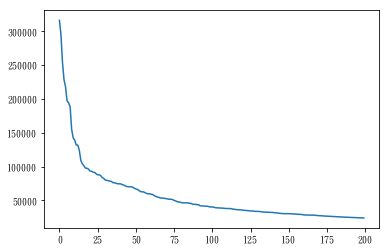

In [573]:
plt.plot(counts[:200])

In [574]:
# with open("D:4.AutoencoderForArticle.Mid-Industry/tokenizer.p","wb") as f:
#     pickle.dump(tokenizer,f)

#### build tokenizer for individual industry

In [103]:
token={}
for i in tqdm_notebook(industry):
    tokenizer_partial=Tokenizer()
    text_partial=news[news["medi-industry"]==i].iloc[:,2]
    tokenizer_partial.fit_on_texts(text_partial)
    token[i]=tokenizer_partial
    
    

In [136]:
#### 已經計算出token (各產業的tokenizer)

n=60
print(industry[n])
print(pd.Series(token[industry[n]].word_counts).sort_values(ascending=False)[:700])

手機零組件
營收      1393
億元       932
手機       741
季        724
成長       680
合併       626
今年       622
客戶       524
產品       520
而        458
表示       450
閎暉       442
公司       434
市場       389
月份       386
出貨       338
大立光      328
去年       324
聯發科      304
目前       299
毛利率      298
比重       296
淳安       291
訂單       284
水準       259
綠點       256
營運       247
表現       246
手機按鍵     246
畫素       239
        ... 
億美元       17
stn       17
創新        17
買進        17
經營        17
黑莓        17
車用        17
遊戲        17
激勵        16
影像        16
市         16
逐季        16
拿下        16
私募        16
相對        16
升值        16
關鍵        16
發行        16
升高        16
智能手機      16
現金股利      16
功能型       16
季在        16
事務機器      16
pda       16
態勢        16
處理        16
led       16
規定        16
支持        16
Length: 700, dtype: int64


In [576]:
# with open("D:4.AutoencoderForArticle.Mid-Industry/tokenizers.p","wb") as f:
#     pickle.dump(token,f)